## Collect raw data

In [1551]:
import pandas as pd
import pytrends
from google.cloud import bigquery

client = bigquery.Client(location="US")
print("Client creating using default project: {}".format(client.project))
# read data main table for model
query = """
    select * from `gaf-np-ds.warranty_claims.time_series_data` 
"""
#sales_data = pd.read_gbq(query, dialect='standard')

raw_data = pd.read_gbq(query, dialect='standard')

raw_data.head(2)

import warnings
warnings.filterwarnings('ignore')


Client creating using default project: gaf-np-ds


Downloading: 100%|██████████| 205/205 [00:00<00:00, 937.88rows/s]


<!-- #### google tren using history method -->

In [1638]:
# raw_data.head(2)

## Google trend data

In [1553]:
#sequence of words doesnot matter
string_to_search=[['roof warranty'],['claim roof'],['gaf roof warranty'],['roof claim procedure'],
                 ['gaf'],['owens corning'],['roof repair'],['roof'],['roofing'],['roofer'],['roofing contractor'],
                 ['roof damage'],['timberline hd'],['shingles'],['hail'],['hail storm'],['storm'],['hail damage'],['weather']]  #,'gaf roof warranty']


In [1639]:
# ??pytrend.interest_by_region

# all_df.columns

In [1555]:
# !pip install pytrends
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US')
all_df=pd.DataFrame()

for string in string_to_search:
    pytrend.build_payload(kw_list=string,geo='US')   #['gaf roof warranty'])
    # df = pytrend.interest_by_region()
    # giving data from 2015
    df=pytrend.interest_over_time()
    print(df.shape)
    if all_df.empty:
        all_df=df
    else:
        if df.empty:
            continue
        all_df=pd.merge(all_df,df,left_index=True,right_index=True)
        
for c in all_df.columns:   
    print(c)
    if 'isPartial' in  c:
        try:
            del all_df[c]
        except:
            pass
    else:
        all_df.rename(columns={c:'search_'+c},inplace=True)

#below will sum up each date and for a month sum date will be last day of month        
all_df=all_df.resample('M').sum()   #.iloc[:-1]

all_df=all_df.reset_index().rename(columns={'date': 'Date'}).set_index('Date')

# print(all_df.reset_index().rename(columns={'date': 'Date'}).set_index('Date'))

        
# pytrend
df.tail(20)
all_df.head(5)



(261, 2)
(261, 2)
(261, 2)
(0, 0)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
(261, 2)
roof warranty
isPartial_x
claim roof
isPartial_y
gaf roof warranty
isPartial_x
gaf
isPartial_y
owens corning
isPartial_x
roof repair
isPartial_y
roof
isPartial_x
roofing
isPartial_y
roofer
isPartial_x
roofing contractor
isPartial_y
roof damage
isPartial_x
timberline hd
isPartial_y
shingles
isPartial_x
hail
isPartial_y
hail storm
isPartial_x
storm
isPartial_y
hail damage
isPartial_x
weather
isPartial_y


,search_roof warranty,search_claim roof,search_gaf roof warranty,search_gaf,search_owens corning,search_roof repair,search_roof,search_roofing,search_roofer,search_roofing contractor,search_roof damage,search_timberline hd,search_shingles,search_hail,search_hail storm,search_storm,search_hail damage,search_weather
Date,,,,,,,,,,,,,,,,,,
2015-07-31,123,33,0,180,155,99,145,143,124,66,59,54,170,41,16,51,37,67
2015-08-31,303,131,195,433,376,244,327,341,205,131,167,166,424,127,43,194,138,171
2015-09-30,183,102,0,321,294,223,241,262,144,120,123,166,337,98,15,109,43,155
2015-10-31,174,79,44,327,269,201,230,244,175,97,98,186,334,108,18,99,49,149
2015-11-30,193,93,44,328,272,232,261,263,193,109,130,108,385,171,15,111,27,180


#### Trend statewise

In [1556]:
# !pip install pytrends
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US')
all_df_region=pd.DataFrame()

for string in string_to_search:
    pytrend.build_payload(kw_list=string,geo='US')   #['gaf roof warranty'])
    # df = pytrend.interest_by_region()
    # giving data from 2015
    df=pytrend.interest_by_region(resolution='REGION')
#     df=pytrend.interest_over_time()
    print(df.shape)
    if all_df_region.empty:
        all_df_region=df
    else:
        if df.empty:
            continue
        all_df_region=pd.merge(all_df_region,df,left_index=True,right_index=True)
        
for c in all_df_region.columns:        
    if 'isPartial' in  c:
        del all_df_region[c]
    else:
        all_df_region.rename(columns={c:'search_'+c},inplace=True)

#below will sum up each date and for a month sum date will be last day of month        
# all_df_region=all_df_region.resample('M').sum()   #.iloc[:-1]

# all_df_region=all_df_region.reset_index().rename(columns={'date': 'Date'}).set_index('Date')
        
# pytrend
df.tail(20)
all_df_region.head(5)



(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)
(51, 1)


,search_roof warranty,search_claim roof,search_gaf roof warranty,search_roof claim procedure,search_gaf,search_owens corning,search_roof repair,search_roof,search_roofing,search_roofer,search_roofing contractor,search_roof damage,search_timberline hd,search_shingles,search_hail,search_hail storm,search_storm,search_hail damage,search_weather
geoName,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,61,16,40,85,69,32,21,52,0,76,32,17,45,17,76
Alaska,0,0,0,0,14,0,32,93,59,20,0,0,0,68,27,14,35,0,77
Arizona,100,0,0,0,29,17,44,77,64,33,21,37,0,58,31,23,33,10,65
Arkansas,0,0,0,0,31,28,32,78,68,30,14,73,0,79,37,26,42,25,80
California,54,14,0,0,34,19,32,66,43,28,22,22,28,49,30,11,29,3,66


In [1557]:
# ?pytrend.build_payload

In [1644]:
# clean_data_all.head(2)
# raw_data.head(4)

,Claim_Type,Date,__Claims_Opened,__Claims_Paid_,__Paid,__Paid___Claim,__Claims_Denied,string_field_7,string_field_8,string_field_9,string_field_10,string_field_11,string_field_12,string_field_13,string_field_14,string_field_15,string_field_16
0,Enhanced,Sep-17,208,19,84588.82,"$4,452.04",38,None,None,None,None,None,None,None,None,None,None
1,Enhanced,Feb-17,125,21,27579.11,"$1,313.29",34,None,None,None,None,None,None,None,None,None,None
2,Enhanced,Mar-17,151,22,52946.56,"$2,406.66",27,None,None,None,None,None,None,None,None,None,None
3,Enhanced,Jul-17,130,36,571318.59,"$15,869.96",43,None,None,None,None,None,None,None,None,None,None


## Preprocess data

In [1654]:
clean_data_all=raw_data.copy()

#convert Date to datetime
clean_data_all['Date']=clean_data_all['Date'].apply(lambda x: datetime.datetime.strptime(x,'%b-%y').strftime('%d-%b-%y'))
print(clean_data_all['Date'])

#remove unnecessary columns
for c in clean_data_all.columns:
    if 'string_field' in c:
        del clean_data_all[c]

        
# all_df=all_df.resample('M').sum()   #.iloc[:-1]


clean_data_all['Date']=pd.to_datetime(clean_data_all['Date'])
print(clean_data_all['Date'].dtypes)
datetime.datetime.strptime('Nov-17','%b-%y').strftime('%m-%Y')

#set date as index
clean_data_all=clean_data_all.set_index('Date')
clean_data_all.sort_index(inplace=True, ascending=True)
# clean_data_all=clean_data_all[['__Claims_Opened','__Claims_Paid_','__Claims_Denied']].resample('M').sum()
# print(clean_data_all.head(2))
clean_data_all['__Paid___Claim']=clean_data_all['__Paid___Claim'].apply(lambda x: x.replace('$','').replace(',',''))

import datetime

ts_columns=['__Claims_Opened','__Claims_Paid_','__Claims_Denied','__Paid','__Paid___Claim']
for c in ts_columns:
    clean_data_all[c]=clean_data_all[c].apply(pd.to_numeric, errors='coerce')


0      01-Sep-17
1      01-Feb-17
2      01-Mar-17
3      01-Jul-17
4      01-May-17
         ...    
200    01-Dec-19
201    01-Nov-19
202    01-Apr-19
203    01-Jun-17
204    01-Aug-19
Name: Date, Length: 205, dtype: object
datetime64[ns]


In [1655]:
# 
clean_data_all.head(2)

,Claim_Type,__Claims_Opened,__Claims_Paid_,__Paid,__Paid___Claim,__Claims_Denied
Date,,,,,,
2017-01-01,New Material,120.0,23.0,105574.09,4590.18,19.0
2017-01-01,Standard,458.0,129.0,333362.03,2584.20,81.0


In [1656]:
clean_data_all.head(2)

# all_df=all_df.resample('M').sum()   #.iloc[:-1]


,Claim_Type,__Claims_Opened,__Claims_Paid_,__Paid,__Paid___Claim,__Claims_Denied
Date,,,,,,
2017-01-01,New Material,120.0,23.0,105574.09,4590.18,19.0
2017-01-01,Standard,458.0,129.0,333362.03,2584.20,81.0


In [1657]:
raw_data.columns
clean_data_all['Claim_Type'].value_counts()

New Material    41
Composites      41
Low Slope       41
Standard        41
Enhanced        41
Name: Claim_Type, dtype: int64

#### Consider __Claims_Opened all and resample

In [1658]:
clean_data_full=clean_data_all.copy()
clean_data_New_Material=clean_data_all[clean_data_all['Claim_Type']=='New Material']
clean_data_Composites=clean_data_all[clean_data_all['Claim_Type']=='Composites']
clean_data_Low_Slope=clean_data_all[clean_data_all['Claim_Type']=='Low Slope']
clean_data_Standard=clean_data_all[clean_data_all['Claim_Type']=='Standard']
clean_data_Enhanced=clean_data_all[clean_data_all['Claim_Type']=='Enhanced']
# clean_data_all=clean_data_all[['__Claims_Opened']]



In [1653]:
# clean_data_all.head(8)

In [1659]:
# clean_data_full['__Claims_Paid_']
clean_data_all.resample('M').sum().head(2) 

,__Claims_Opened,__Claims_Paid_,__Paid,__Paid___Claim,__Claims_Denied
Date,,,,,
2017-01-31,763.0,197.0,582884.60,17670.98,157.0
2017-02-28,666.0,120.0,361812.73,11575.43,180.0


#### Calculate claim/paid

In [1660]:
mean_opened_by_paid_New_Material=np.mean(clean_data_New_Material['__Claims_Opened'].values/clean_data_New_Material['__Claims_Paid_'].values)
print(mean_opened_by_paid_New_Material)
mean_opened_by_paid_Composites=np.nanmean(clean_data_Composites['__Claims_Opened'].values/clean_data_Composites['__Claims_Paid_'].values)
print(mean_opened_by_paid_Composites)
mean_opened_by_paid_Low_Slope=np.mean(clean_data_Low_Slope['__Claims_Opened'].values/clean_data_Low_Slope['__Claims_Paid_'].values)
print(mean_opened_by_paid_Low_Slope)
mean_opened_by_paid_Standard=np.mean(clean_data_Standard['__Claims_Opened'].values/clean_data_Standard['__Claims_Paid_'].values)
print(mean_opened_by_paid_Standard)
mean_opened_by_paid_Enhanced=np.mean(clean_data_Enhanced['__Claims_Opened'].values/clean_data_Enhanced['__Claims_Paid_'].values)
print(mean_opened_by_paid_Enhanced)
mean_opened_by_paid_all=np.nanmean(clean_data_full['__Claims_Opened'].values/clean_data_full['__Claims_Paid_'].values)
print(mean_opened_by_paid_all)



7.605324175281834
nan
3.693283143186866
4.127868415516564
3.7658612674158625
4.798084250350282


In [1661]:
clean_data_all.tail(5)
#resample is only required for total data
clean_data_all=clean_data_all.resample('M').sum()   #.iloc[:-1]
clean_data_full=clean_data_full.resample('M').sum()
clean_data_all.head(2)

,__Claims_Opened,__Claims_Paid_,__Paid,__Paid___Claim,__Claims_Denied
Date,,,,,
2017-01-31,763.0,197.0,582884.60,17670.98,157.0
2017-02-28,666.0,120.0,361812.73,11575.43,180.0


In [1662]:
clean_data_full.head(2)

,__Claims_Opened,__Claims_Paid_,__Paid,__Paid___Claim,__Claims_Denied
Date,,,,,
2017-01-31,763.0,197.0,582884.60,17670.98,157.0
2017-02-28,666.0,120.0,361812.73,11575.43,180.0


In [1567]:
# raw_data[raw_data['Date']=='Sep-17'].head(10)

#### Parameters

In [1663]:
#'_Paid___Claim','_Paid'
column_to_use='__Claims_Opened'


## Check corelation of trend data and main data

In [1665]:
# Take google trend data till the month available of main data
all_df=all_df.loc[:clean_data_all.index[-1],]

#store all corelation in dictionary for all search
corr={k:[] for k in all_df.columns}

#no of lag to check corelation
max_lag=10

l=clean_data_all.shape[0]
for i in range(0,max_lag):
    temp=all_df.iloc[(len(all_df)-l-i):]
#     print('trend\n',temp.head(3))
    temp=temp.shift(i)
#     print('trend after shift\n',temp.head(3),'\norig\n',clean_data_all.head(3))
#     print('shape',temp.shape,clean_data_all.shape)
    for c in temp.columns:
        temp1=temp[c]
        t=pd.concat([clean_data_all[column_to_use],temp1],axis=1)
#         print('concat\n',t.head(5))
        print('Corelation of ',column_to_use,' with ',c,' with lag ',i,t.corr().iloc[0][1])
        corr[c].append(t.corr().iloc[0][1])
#         print(i,temp.shape,temp.head(2))

Corelation of  __Claims_Opened  with  search_roof warranty  with lag  0 0.16632542539953385
Corelation of  __Claims_Opened  with  search_claim roof  with lag  0 0.47367340569601757
Corelation of  __Claims_Opened  with  search_gaf roof warranty  with lag  0 0.19108591755168491
Corelation of  __Claims_Opened  with  search_gaf  with lag  0 0.3898452513672127
Corelation of  __Claims_Opened  with  search_owens corning  with lag  0 0.3627572551371502
Corelation of  __Claims_Opened  with  search_roof repair  with lag  0 0.2395038384768909
Corelation of  __Claims_Opened  with  search_roof  with lag  0 0.27003999455823685
Corelation of  __Claims_Opened  with  search_roofing  with lag  0 0.43006476468811305
Corelation of  __Claims_Opened  with  search_roofer  with lag  0 0.27677971491312675
Corelation of  __Claims_Opened  with  search_roofing contractor  with lag  0 0.14765817072777435
Corelation of  __Claims_Opened  with  search_roof damage  with lag  0 0.42586090510469105
Corelation of  __Clai

#### Create extreg dataframe

In [1666]:
# Append the lags of external regressor to main dataframe
trend_df=pd.DataFrame()
c_l=[]
for c in all_df.columns:
#     print(corr[c])
    l=[l*-1 if l<0 else l for l in corr[c]]
    l1=np.argmax(np.array(l))
    print('Best corelation with ',c,' with time series data ',l[l1],' for lag ',l1)
    c_l.append(l[l1])
    
#     print('shifting...',l1,all_df[c].iloc[(len(all_df)-len(clean_data_all)-l1):-l1].shift(l1).head(2))
    trend_df[c]=all_df[c].shift(l1).iloc[(len(all_df)-len(clean_data_all)):]

    #concat l1 lag to maindataframe
c_l    

#rearrange dataframe columns as per most to least corelated columns
li=np.argsort(-1*np.array(c_l)).tolist()
new_col=[trend_df.columns[i] for i in li]
print(trend_df.head(2))
trend_df=trend_df[new_col]
print(trend_df.head(2))
# print(trend_df.columns)


Best corelation with  search_roof warranty  with time series data  0.5430777219062024  for lag  1
Best corelation with  search_claim roof  with time series data  0.47367340569601757  for lag  0
Best corelation with  search_gaf roof warranty  with time series data  0.28096490829194914  for lag  9
Best corelation with  search_gaf  with time series data  0.45237727588611143  for lag  1
Best corelation with  search_owens corning  with time series data  0.38084425003019196  for lag  1
Best corelation with  search_roof repair  with time series data  0.5293602300145271  for lag  9
Best corelation with  search_roof  with time series data  0.38433387557767934  for lag  1
Best corelation with  search_roofing  with time series data  0.4426207574697389  for lag  1
Best corelation with  search_roofer  with time series data  0.4737108532318989  for lag  9
Best corelation with  search_roofing contractor  with time series data  0.5245412792284849  for lag  9
Best corelation with  search_roof damage  w

In [1577]:
# all_df.tail(2)

In [1667]:
print(clean_data_all.shape)
print(trend_df.shape)


(41, 5)
(41, 18)


<!-- #### Merge trend data and google trend -->

In [1669]:
trend_df.head(2)

,search_roof damage,search_roof warranty,search_timberline hd,search_roof repair,search_roofing contractor,search_roofer,search_claim roof,search_shingles,search_hail damage,search_weather,search_hail,search_gaf,search_storm,search_roofing,search_roof,search_owens corning,search_hail storm,search_gaf roof warranty
Date,,,,,,,,,,,,,,,,,,
2017-01-31,237.0,145.0,81.0,309.0,254.0,267.0,175,243.0,237.0,159.0,201.0,185.0,95.0,211.0,255.0,190.0,13.0,36.0
2017-02-28,273.0,212.0,111.0,318.0,251.0,339.0,130,325.0,225.0,153.0,214.0,266.0,168.0,321.0,351.0,274.0,9.0,73.0


## Descriptive for all category together

<!-- ## Process for __Claims_Opened and claim_type='New Material' -->

(41, 5)


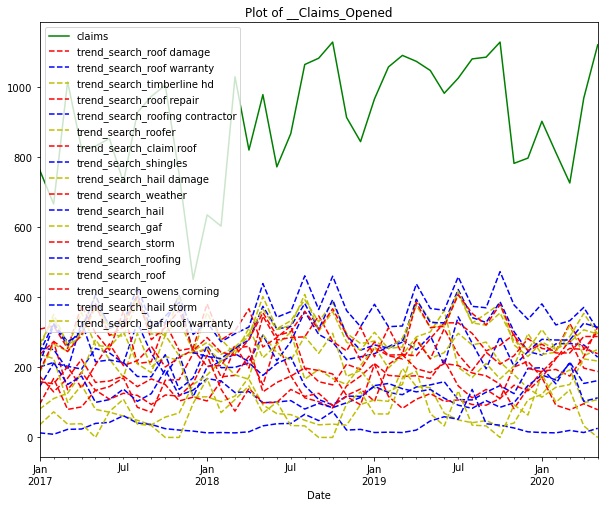

In [1676]:
# columns to use and claim type to use
# claim_type='New Material'

#for processing all comment below
# clean_data=clean_data_all[clean_data_all['Claim_Type']==claim_type]
clean_data=clean_data_all.copy()


# print(clean_data.head(2))
print(clean_data.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
clean_data[column_to_use].plot(legend=True,label='claims',color='g',title='Plot of '+column_to_use)
colors=['r','b','y']
i=0
for c in trend_df.columns:
    trend_df[c].plot(legend=True,label='trend_'+c,style='--',color=colors[i])
    i=i+1
    if i>=len(colors):
        i=0


In [1583]:
# clean_data.index.dtype

In [1584]:
# clean_data = clean_data.asfreq('d')
# print(clean_data)
# clean_data = clean_data.fillna(method='bfill').fillna(method='ffill')
# ?result.plot
# clean_data


#### Decompose TS with 12 month frequency

<Figure size 720x576 with 0 Axes>

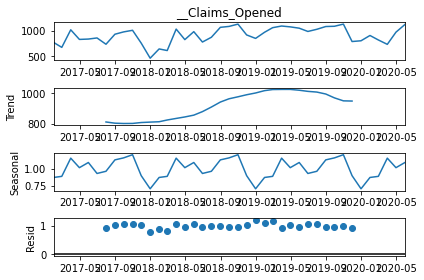

In [1677]:
# decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# increasing frequency will smoothen trend
def decompose(col):
    result=seasonal_decompose(col,model='multiplicative',freq=12)
    plt.figure(figsize=(10,8))

    result.plot()
    plt.show()
    
decompose(clean_data[column_to_use])

#### COrelation plots

ACF PACF plot for__Claims_Opened
AxesSubplot(0.125,0.125;0.775x0.755)
Figure(432x288)
Figure(432x288)


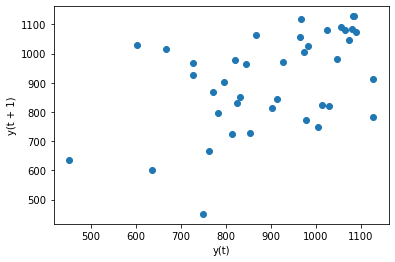

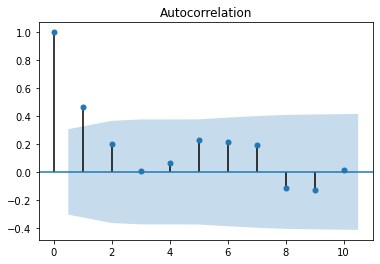

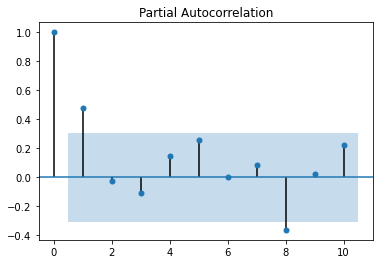

In [1678]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

def corr_plot(df,lags=10):
    print('ACF PACF plot for'+column_to_use)
    print(lag_plot(df))
    print(plot_acf(df,lags=lags))
    print(plot_pacf(df,lags=lags))

corr_plot(clean_data[column_to_use],lags=10)

In [1587]:
# raw_data['date']
# clean_data[[column_to_use]]

#### Calculate moving average on 6 months and 12 months

MA 6 and 12 months for  __Claims_Opened
EWMA


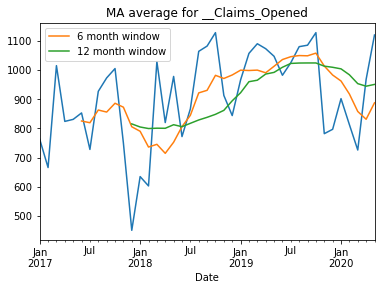

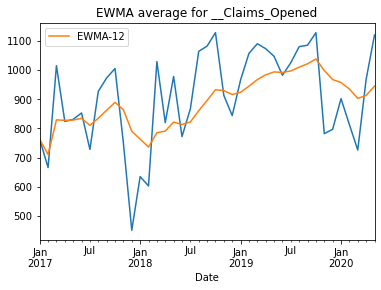

In [1682]:
## moving average
def MA(df):
#     clean_data[column_to_use]
    # df=df.dropna()
    # clean_data=clean_data[[column_to_use]]
    print('MA 6 and 12 months for ',column_to_use)
    clean_data['6 month window']=clean_data[column_to_use].rolling(window=6).mean()
    clean_data['12 month window']=clean_data[column_to_use].rolling(window=12).mean()
    clean_data[[column_to_use,'6 month window','12 month window']].plot(title='MA average for '+column_to_use)
    # EWMA
    print('EWMA')
    clean_data['EWMA-12']=clean_data[column_to_use].ewm(span=12).mean()
    clean_data[[column_to_use,'EWMA-12']].plot(title='EWMA average for '+column_to_use)
    
MA(clean_data)    


## Forcasting models
#### Train test split 

In [1683]:
# Create model with exponential smoothing
def split_data(clean_data,trend_df,loc=35):
    train_data=clean_data.iloc[:loc]
    test_data=clean_data.iloc[loc:]
    train_data_exo=trend_df.iloc[:loc]
    test_data_exo=trend_df.iloc[loc:]
    return train_data,test_data,train_data_exo,test_data_exo
#all
train_data,test_data,train_data_exo,test_data_exo=split_data(clean_data_all,trend_df, loc=35)
#categorywise
train_data_New_Material,test_data_New_Material,train_data_exo,test_data_exo=split_data(clean_data_New_Material,trend_df, loc=35)
train_data_Composites,test_data_Composites,train_data_exo,test_data_exo=split_data(clean_data_Composites,trend_df, loc=35)
train_data_Low_Slope,test_data_Low_Slope,train_data_exo,test_data_exo=split_data(clean_data_Low_Slope,trend_df, loc=35)
train_data_Standard,test_data_Standard,train_data_exo,test_data_exo=split_data(clean_data_Standard,trend_df, loc=35)
train_data_Enhanced,test_data_Enhanced,train_data_exo,test_data_exo=split_data(clean_data_Enhanced,trend_df, loc=35)




#### 1.forcasting with EWMA

mean_absolute_error 144.38599817643424
mean_squared_error 52703.350710091356
mean_absolute_percentage_error train 8.89968152293824
mean_absolute_percentage_error test 18.455633567906556


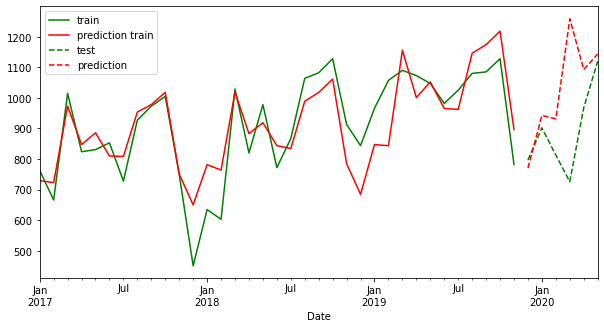

In [1684]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error   ##, mean_absolute_percentage_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def forcase_ewma(train,test):
    model=ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
    test_predictions=model.forecast(6)  #forcast for 5 months

    #training error
    start=0
    end=len(train)-1
    pred_train=model.predict(start,end).rename('ARMA (2,2) prediction')
    
    train.plot(legend=True,label='train',figsize=(10,5),color='g')
    pred_train.plot(legend=True,label='prediction train',color='r')
    test.plot(legend=True,label='test',style='--',color='g')
    test_predictions.plot(legend=True,label='prediction',style='--',color='r') 
    
    
    print('mean_absolute_error',mean_absolute_error(test,test_predictions))
    print('mean_squared_error',mean_squared_error(test,test_predictions))
    print('mean_absolute_percentage_error train',mean_absolute_percentage_error(train,pred_train))
    print('mean_absolute_percentage_error test',mean_absolute_percentage_error(test,test_predictions))

forcase_ewma(train_data[column_to_use],test_data[column_to_use])


In [1525]:
# start_index = 0
# end_index = len(train_data)
# forecastold = model.predict(model.param_names,start=start_index, end=end_index)
# forecastold
# # ??model.predict

#### 2.AR model forcast

AIC score 10.130761781411215
Date
2017-01-31    763.0
2017-02-28    666.0
Freq: M, Name: __Claims_Opened, dtype: float64 2017-02-28    841.035698
2017-03-31    794.019800
Freq: M, dtype: float64
mean_absolute_error 100.631877144432
mean_squared_error 14945.752921101157
mean_absolute_percentage_error 11.454732456136373


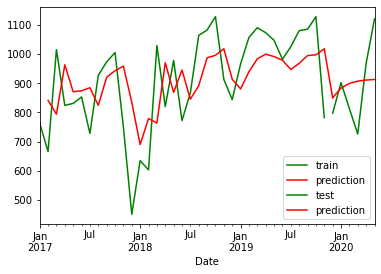

In [1685]:
#use arima
from statsmodels.tsa.ar_model import AR,ARResults


def forcast_ar(train,test):
    modelar=AR(train)
    AR1fit=modelar.fit(maxlag=1)
    print('AIC score',AR1fit.aic)

    pred_train=AR1fit.predict(start=1,end=35)
    pred=AR1fit.predict(start=35,end=40)
    train.plot(legend=True,color='green',label='train')
    pred_train.plot(legend=True,color='red',label='prediction')
    test.plot(legend=True,color='green',label='test')
    pred.plot(legend=True,color='red',label='prediction')
    print(train.head(2),pred_train.head(2))
    print('mean_absolute_error',mean_absolute_error(test,pred))
    print('mean_squared_error',mean_squared_error(test,pred))
    print('mean_absolute_percentage_error',mean_absolute_percentage_error(test,pred))

forcast_ar(train_data[column_to_use],test_data[column_to_use])

In [1686]:
# test_data[column_to_use]
#dickey fuller test
from statsmodels.tsa.stattools import adfuller
print(adfuller(test_data[column_to_use]))
#p value .56

(-2.176820714679295, 0.21476548891383107, 1, 4, {'1%': -7.355440625, '5%': -4.474365000000001, '10%': -3.1269325}, 50.218175773655844)


#### ARIMA model with auto_arima selection

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=449.129, BIC=452.182, Time=0.011 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=447.720, BIC=452.299, Time=0.022 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=443.446, BIC=448.025, Time=0.059 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=447.129, BIC=448.656, Time=0.008 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=449.324, BIC=455.429, Time=0.094 seconds
Total fit time: 0.198 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -218.723
Date:                Thu, 16 Jul 2020   AIC                            443.446
Ti

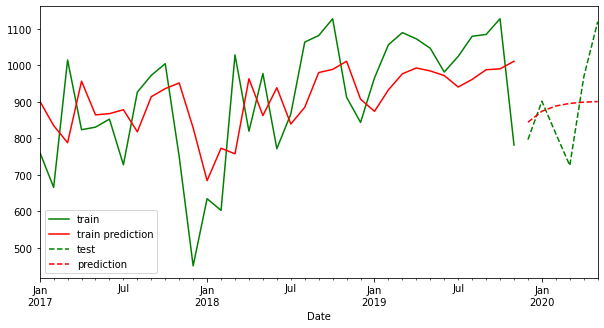

In [1687]:
#autoarima
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from pmdarima import auto_arima

def forcast_arima(train,test,order):
    stepwise=auto_arima(train,start_p=0,start_q=0,pax_p=6,max_q=6,seasonal=False,trace=True)
    print(stepwise.summary())

    #non stationary data
    auto_arima(train,seasonal=False).summary()
    # this gives us ARMa model as best with order of 0,0
    model=ARIMA(train,order=order)
    results=model.fit()
    print(results.summary())
    #predict future data
    start=len(train)
    end=len(train)+len(test)-1
    pred=results.predict(start,end).rename('ARMA (2,2) prediction')
    
    start=0
    end=len(train)-1
    pred_train=results.predict(start,end).rename('ARMA (2,2) prediction')
#     pred_train=pred_train.shift(-1)[:-1]
    print('-----',len(train),len(pred_train),'\n',train.tail(2),'\n',pred_train.tail(2))
    print('-----',len(test),len(pred),'\n',test.tail(2),'\n',pred.tail(2))
    
    
    train.plot(legend=True,color='green',label='train',figsize=(10,5))
    pred_train.plot(legend=True,color='red',label='train prediction')
    test.plot(legend=True,color='green',label='test',style='--')
    pred.plot(legend=True,color='red',label='prediction',style='--')
    print('mean_absolute_error',mean_absolute_error(test,pred))
    print('mean_squared_error',mean_squared_error(test,pred))
    print('mean_absolute_percentage_error train',mean_absolute_percentage_error(train,pred_train))
    print('mean_absolute_percentage_error test',mean_absolute_percentage_error(test,pred))


forcast_arima(train_data[column_to_use],test_data[column_to_use],order=(1,0,0))

#### 3.SARIMA model

In [1530]:
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
# from pmdarima import auto_arima
# #non stationary data
# stepwise=auto_arima(train_data[column_to_use],seasonal=True,trace=True)
# stepwise.summary()


In [1531]:
# # this gives us SARIMA model as best with order of 0,0
# model=ARIMA(train_data[column_to_use],order=(0,0,0))
# results=model.fit()
# # SARIMA(3,1,0)(1,1,0)12

# print(results.summary())
# #predict future data
# start=len(train_data)
# end=len(train_data)+len(test_data)-1
# pred=results.predict(start,end).rename('ARMA (2,2) prediction')
# test_data[column_to_use].plot()
# pred.plot()


In [1532]:
# here we see a seasonal value but that very less compare to actualvalue so we will ignore seasionality for this case
#auto_arima(df2['Inventories'],seasonal=False)
# this gives aus idea to take d=1, so lets check with d=1 if data become no trend and no seasionality(its ignored) i.e. stationary
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller 
clean_data['Diff_1']=diff(clean_data[column_to_use],k_diff=1)
adfuller(clean_data['Diff_1'].dropna())
# choosing d is easy start with d=1,2,3.. and get difference,
# after each difference run DF test to take d value



(-5.467814545247226,
 2.4364554899021715e-06,
 3,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 373.2811767863926)

length 35 6
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=449.129, BIC=452.182, Time=0.008 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=447.720, BIC=452.299, Time=0.022 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=443.446, BIC=448.025, Time=0.066 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=447.129, BIC=448.656, Time=0.009 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=449.324, BIC=455.429, Time=0.114 seconds
Total fit time: 0.225 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -218.723
Date:                Thu, 16 Jul 2020   AIC                          

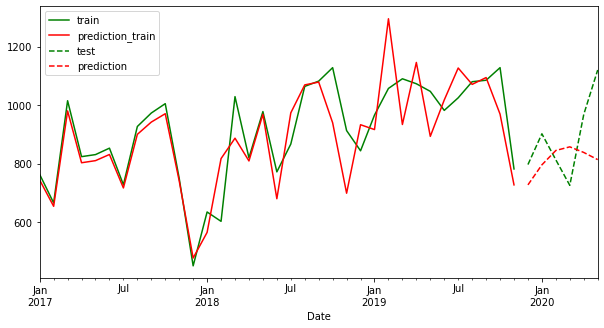

In [1688]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def forcast_sarima(train,test,order=(1,0,0),seasonal_order=(1,0,0,12)):
    print('length', len(train),len(test))
    stepwise=auto_arima(train,start_p=0,start_q=0,pax_p=6,max_q=6,seasonal=True,trace=True)
    print(stepwise.summary())

    
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)  #,exog=train_data[''])
    results=model.fit()
    print(results.summary())
    #predict future data
    start=len(train)
    end=len(train)+len(test)
    #prediction starts from 0 so ignoring last row 
    pred=results.predict(start,end).rename('ARMA (2,2) prediction')[:-1]
    
    start=0
    end=len(train)
    #pred train starts from 0
    pred_train=results.predict(start,end).rename('ARMA (2,2) prediction')
    pred_train=pred_train.shift(-1)[:-1]
    print('-----',len(train),len(pred_train),'\n',train.tail(2),'\n',pred_train.tail(2))
    print('-----',len(test),len(pred),'\n',test.tail(2),'\n',pred.tail(2))
    
    print('pred len',len(pred_train),len(pred))
    train.plot(legend=True,color='green',label='train')
    pred_train.plot(legend=True,color='red',label='prediction_train')
    test.plot(legend=True,color='green',label='test',style='--',figsize=(10,5))
    pred.plot(legend=True,color='red',label='prediction',style='--')

    print('mean_absolute_error',mean_absolute_error(test,pred))
    print('mean_squared_error',mean_squared_error(test,pred))
    print('mean_absolute_percentage_error train',mean_absolute_percentage_error(train,pred_train))
    print('mean_absolute_percentage_error test',mean_absolute_percentage_error(test,pred))

forcast_sarima(train_data[column_to_use],test_data[column_to_use],order=(1,0,0),seasonal_order=(1,0,0,12))
    

In [1534]:
pred

35    1085.730985
36     910.938583
37     842.684783
38    1372.793786
39    1181.561992
40    1096.506914
Name: yhat, dtype: float64

#### 4.SARIMAX

In [1535]:
# clean_data['__Claims_Denied',column_to_use]

Shape  35 6 (35, 1) (6, 1)
                                     SARIMAX Results                                      
Dep. Variable:                    __Claims_Opened   No. Observations:                   35
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -218.611
Date:                            Thu, 16 Jul 2020   AIC                            445.222
Time:                                    16:43:37   BIC                            451.443
Sample:                                01-31-2017   HQIC                           447.370
                                     - 11-30-2019                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
search_roof damage    -1.4379      0.400     -3.596      0.000      -2.

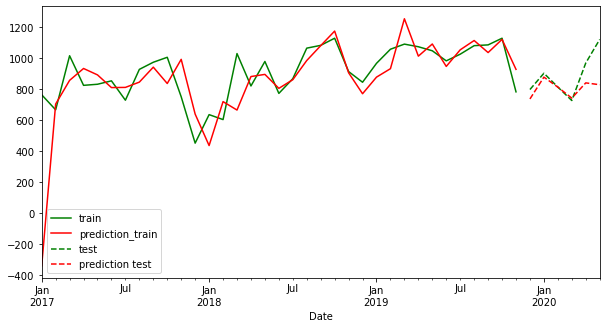

In [1689]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def forcast_sarimax(train, test, order, seasonal_order,exog_train,exog_test):
    print('Shape ',len(train),len(test),exog_train.shape,exog_test.shape)
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order,exog=exog_train)
    results=model.fit()
    print(results.summary())
    
    start=0
    end=len(train)-1
    print('start end index',start,end)
    pred_train=results.predict(start,end,exog=exog_train)
    
    #predict future data
    start=len(train)
    end=len(train)+len(test)-1
    print('start end index',start,end)
    pred=results.predict(start,end,exog=exog_test)
    
    print('--train n pred---',len(train),len(pred_train),'\n',train.head(2),'\n',pred_train.head(2))
    print('---test n pred--',len(test),len(pred),'\n',test.head(2),'\n',pred.head(2))
    print('-----',len(train),len(pred_train),'\n',train.tail(2),'\n',pred_train.tail(2))
    print('-----',len(test),len(pred),'\n',test.tail(2),'\n',pred.tail(2))
    
    
    train.plot(legend=True,color='green',label='train')
    pred_train.plot(legend=True,color='red',label='prediction_train')
    test.plot(legend=True,color='green',label='test',style='--')
    pred.plot(legend=True,color='red',label='prediction test',style='--',figsize=(10,5))
    
    
#     test.plot(legend=True,color='green',label='test',)
    

    print('mean_absolute_error',mean_absolute_error(test,pred))
    print('mean_squared_error',mean_squared_error(test,pred))
    print('mean_absolute_percentage_error train',mean_absolute_percentage_error(train,pred_train))
    print('mean_absolute_percentage_error test',mean_absolute_percentage_error(test,pred))

    return results

# forcast_sarimax(train_data[column_to_use],test_data[column_to_use],order=(1,0,0),seasonal_order=(1,0,0,12),exog_train=train_data['__Claims_Denied'],exog_test=test_data['__Claims_Denied'])
#use first columns of trend data ss external 
# results=forcast_sarimax(train_data[column_to_use],test_data[column_to_use],order=(1,0,0),seasonal_order=(1,0,0,12),exog_train=train_data_exo[['search_roof warranty']],exog_test=test_data_exo[['search_roof warranty']])
results=forcast_sarimax(train_data[column_to_use],test_data[column_to_use],order=(1,0,0),seasonal_order=(1,0,0,12),exog_train=train_data_exo[[train_data_exo.columns[0]]],exog_test=test_data_exo[[test_data_exo.columns[0]]])


# trend_df

In [1537]:
train_data_exo[[train_data_exo.columns[0]]]

test_data_exo[['search_roof warranty']]

,search_roof warranty
Date,
2019-12-31,245.0
2020-01-31,235.0
2020-02-29,267.0
2020-03-31,268.0
2020-04-30,264.0
2020-05-31,229.0


In [1539]:
# test_data_exo[['search_roof claim']]

In [1540]:
# test_data_exo[['search_roof claim']].shape
train_data_exo.index
# 

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [1690]:
train_data.head(2)
# train_data_exo.head(2)
train_data_exo[['search_roof warranty']].head(2)
# train_data

,search_roof warranty
Date,
2017-01-31,145.0
2017-02-28,212.0


In [1691]:
# train_data_exo
# current_df
train_data_exo['search_roof warranty']
# current_df[['search_roof warranty']]=train_data_exo['search_roof warranty']
# current_df=pd.concat([current_df,train_data_exo[['search_roof warranty']].reset_index()],axis=0)
current_df
# train_data_exo['search_roof warranty']
train_data_prop.head(2)

,__Claims_Opened,6 month window,12 month window,EWMA-12,search_roof warranty
Date,,,,,
2017-01-31,763.0,NaN,NaN,763.000000,142.0
2017-02-28,666.0,NaN,NaN,710.458333,214.0


## 5.prophet

In [1543]:
# mean_opened_by_paid=np.mean(clean_data_full['__Claims_Opened'].values/clean_data_full['__Claims_Paid_'].values)
# mean_opened_by_paid_all


In [1713]:
#https://towardsdatascience.com/implementing-facebook-prophet-efficiently-c241305405a3

# !pip install fbprophet
from fbprophet import Prophet

def run_prophet(train_data,mean_opened_by_paid):
    ax=None
    base = train_data.index[-1]
    m = Prophet()
    m = Prophet(yearly_seasonality=True)

    
    current_df = train_data.reset_index()[['Date',column_to_use]].rename(columns={'Date':'ds', column_to_use:"y"})


    #for regressor
    # current_df['search_roof warranty']=train_data_exo[train_data_exo.columns[0]].values 
    # m.add_regressor('search_roof warranty')

    print('current_df shape',current_df.shape)
    m.fit(current_df)
    future_df = m.make_future_dataframe(periods=18,freq='M')  #periods=7*24, freq='M')
    #future dataframe has current+future
    print('future_df shape',future_df.shape)

    #for regressor
    # future_df['search_roof warranty']=pd.concat([train_data_exo[train_data_exo.columns[0]],test_data_exo[test_data_exo.columns[0]]]).values

    forecast = m.predict(future_df)

#     fig = m.plot(forecast[:41], uncertainty=False,plot_cap=False,  ax=ax, figsize=(15,6))
#     fig=m.plot(forecast)
#     fig.title('******')
    # plot(forecast[35:41], uncertainty=False,plot_cap=False,  ax=ax, figsize=(15,6))
    # plt.plot(forecast[['ds','yhat']][41:])
    
    #evalution
    test=test_data[column_to_use]
    train=train_data[column_to_use]
    pred_test=forecast['yhat'][len(train):len(train)+len(test)]
    pred_fut=forecast['yhat'][-12:]
    pred_train=forecast['yhat'][:len(train)]
    print(pred_test.shape,pred_train.shape)
    #calculate error
    print('mean_absolute_error',mean_absolute_error(test,pred_test))
    print('mean_squared_error',mean_squared_error(test,pred_test))
    print('mean_absolute_percentage_error train',mean_absolute_percentage_error(test,pred_test))
    print('mean_absolute_percentage_error validation',mean_absolute_percentage_error(train,pred_train))
    # print('mean_absolute_error train',mean_absolute_error(train,pred_train))
    print('Prediction of claims for next 12 months\n',[round(l,0) for l in list(pred_fut)])
    print('Claims paid prediction\n',[round(l,0) for l in list(pred_fut/mean_opened_by_paid)])

    


    return forecast,m

forecast,m=run_prophet(train_data,mean_opened_by_paid_all)
        
        

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current_df shape (35, 2)
future_df shape (53, 1)
(6,) (35,)
mean_absolute_error 210.24493157279963
mean_squared_error 105599.7968838736
mean_absolute_percentage_error train 27.158190002591958
mean_absolute_percentage_error validation 6.262004847531063
Prediction of claims for next 12 months
 [1120.0, 939.0, 1229.0, 1311.0, 1373.0, 1236.0, 644.0, 1159.0, 1052.0, 1464.0, 1220.0, 1264.0]
Claims paid prediction
 [233.0, 196.0, 256.0, 273.0, 286.0, 258.0, 134.0, 241.0, 219.0, 305.0, 254.0, 263.0]


In [1714]:
# forecast.to_csv('prophet.csv')

In [1715]:
# raw_data[['__Claims_Opened','__Claims_Paid_']]
# raw_data['__Claims_Opened'].values/raw_data['__Claims_Paid_'].values
# raw_data[['__Claims_Paid_']]
# raw_data['__Claims_Opened'].values  


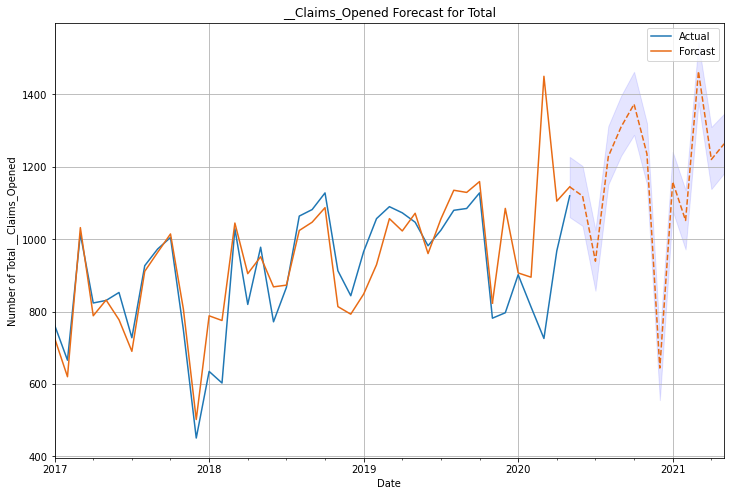

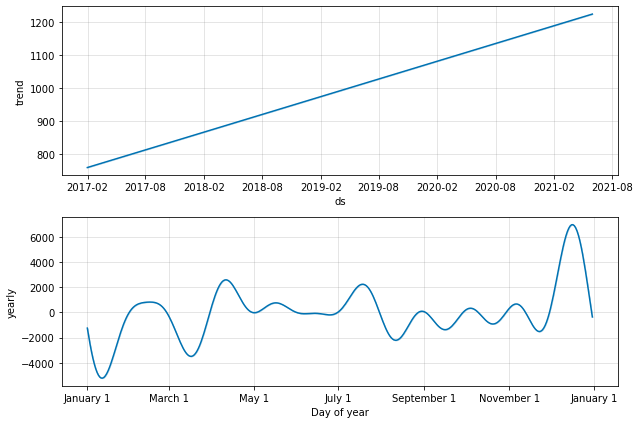

In [1716]:
# forecast[['ds','yhat']].plot()
# fig
# forecast.head(2)
# f,ax=plt.subplot(sharex=True)

def plot_prophet(forecast,train_data,test_data,m,cat='',Total=False):
    forecast_temp=forecast.set_index('ds')[['yhat']]
    forecast_ci=forecast.set_index('ds')[['yhat_lower','yhat_upper']]
    
    merge=pd.concat([train_data,test_data],axis=0)

#     ax=train_data['__Claims_Opened'].plot(legend=True,color='gray',label='train actual',figsize=(12,8)) #,style='.')
#     test_data['__Claims_Opened'].plot(legend=True,color='gray',label='validation actual',ax=ax)
    ax=merge[column_to_use].plot(legend=True,label='Actual',figsize=(12,8),color='#1f77b4') #,style='.')
#     
#     ax.axvline(train_data.index[-1])
#     ax.axvline(test_data.index[-1])
    forecast_temp.rename(columns={'yhat':'Forcast'},inplace=True)
    forecast_temp[:35].plot(legend=True,color='#E86B15',label='Forcast',ax=ax)
    forecast_temp[34:41].plot(legend=False,color='#E86B15',ax=ax)
    forecast_temp[40:].plot(legend=False,color='#E86B15',style='--',ax=ax,grid=True)
#     forecast_ci[40:].plot(legend=True,color='red',label='confidence',style='--',ax=ax,grid=True)
    
    ax.fill_between(forecast_ci[40:].index, forecast_ci[40:]['yhat_lower'], forecast_ci[40:]['yhat_upper'], color='b', alpha=.1)
#     ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    if Total:
        s=' Total '
    else:
        s=' '
    ax.set_ylabel('Number of'+s+column_to_use)
    ax.set_title(column_to_use+' Forecast for '+cat)
    
#     ax.fill_between(y=forecast_ci[40:],color='y')
    
    
#     ax.title('Plot of new')
    
    m.plot_components(forecast)
    
    
plot_prophet(forecast,train_data,test_data,m,cat='Total',Total=True)  

In [1616]:
# clean_data_all['__Claims_Opened'].plot()
# print(forecast.set_index('ds')['yhat'][-6:])
# print(test_data[column_to_use])
# forecast
# clean_data_full[]



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Run for all type
current_df shape (35, 2)
future_df shape (53, 1)
(6,) (35,)
mean_absolute_error 210.24493157279963
mean_squared_error 105599.7968838736
mean_absolute_percentage_error train 27.158190002591958
mean_absolute_percentage_error validation 6.262004847531063
Prediction of claims for next 12 months
 [1120.0, 939.0, 1229.0, 1311.0, 1373.0, 1236.0, 644.0, 1159.0, 1052.0, 1464.0, 1220.0, 1264.0]
Claims paid prediction
 [233.0, 196.0, 256.0, 273.0, 286.0, 258.0, 134.0, 241.0, 219.0, 305.0, 254.0, 263.0]


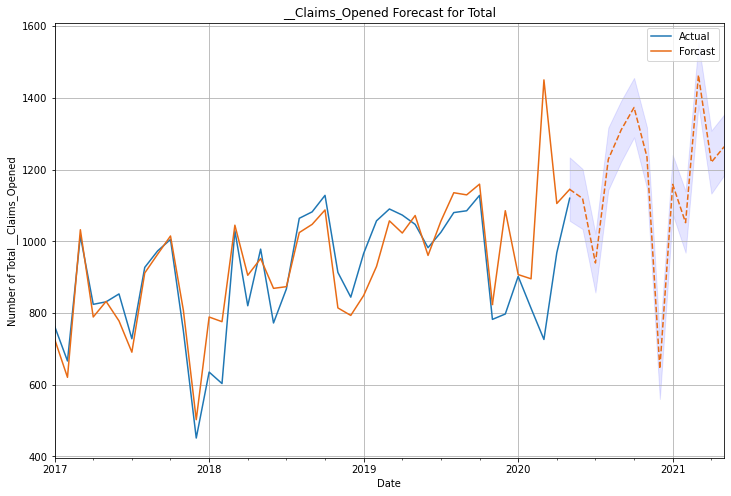

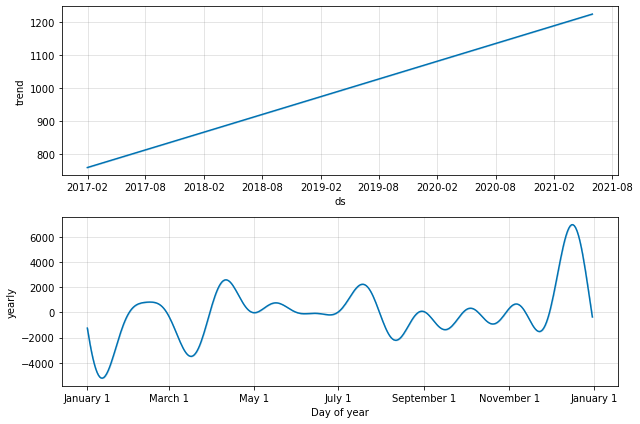

In [1702]:
print('Run for all type')
forecast_all,m_all=run_prophet(train_data,mean_opened_by_paid_all)
plot_prophet(forecast_all,train_data,test_data,m_all,cat='Total',Total=True) 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Run for new material type
current_df shape (35, 2)
future_df shape (53, 1)
(6,) (35,)
mean_absolute_error 728.9314488793128
mean_squared_error 563942.7854202361
mean_absolute_percentage_error train 81.34262374914839
mean_absolute_percentage_error validation 12.32833548678396
Prediction of claims for next 12 months
 [149.0, 143.0, 148.0, 156.0, 172.0, 111.0, 92.0, 107.0, 263.0, 192.0, 142.0, 145.0]
Claims paid prediction
 [20.0, 19.0, 20.0, 21.0, 23.0, 15.0, 12.0, 14.0, 35.0, 25.0, 19.0, 19.0]


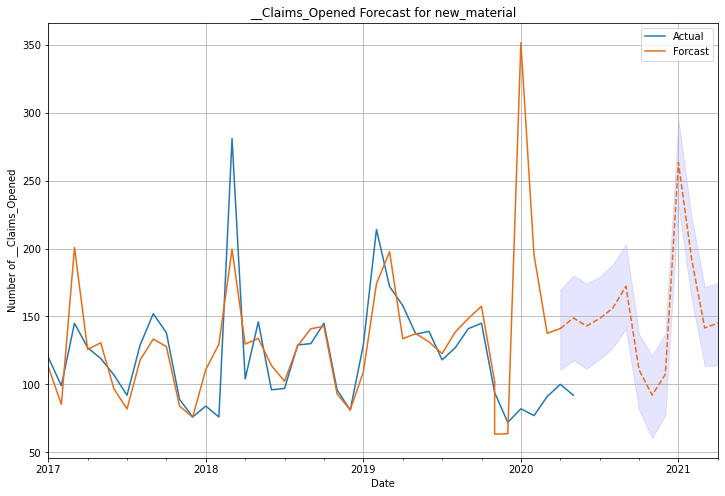

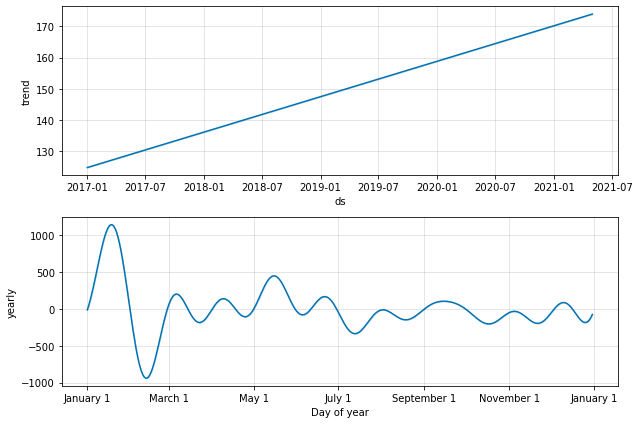

In [1703]:
print('Run for new material type')
forecast_New_Material,m_New_Material=run_prophet(train_data_New_Material,mean_opened_by_paid_New_Material)
plot_prophet(forecast_New_Material,train_data_New_Material,test_data_New_Material,m_New_Material,cat='new_material') 



In [1704]:
print('Run for composite type')  # NaN value
# forecast_composite=run_prophet(train_data_Composites)
# plot_prophet(forecast_composite,train_data_Composites,test_data_Composites) 



Run for composite type


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Run for Low_Slope type
current_df shape (35, 2)
future_df shape (53, 1)
(6,) (35,)
mean_absolute_error 862.8262049108072
mean_squared_error 761067.5147834296
mean_absolute_percentage_error train 97.1490954234316
mean_absolute_percentage_error validation 13.91386480725479
Prediction of claims for next 12 months
 [21.0, 29.0, 22.0, 22.0, 33.0, 15.0, 11.0, 20.0, 27.0, 21.0, 4.0, 38.0]
Claims paid prediction
 [6.0, 8.0, 6.0, 6.0, 9.0, 4.0, 3.0, 5.0, 7.0, 6.0, 1.0, 10.0]


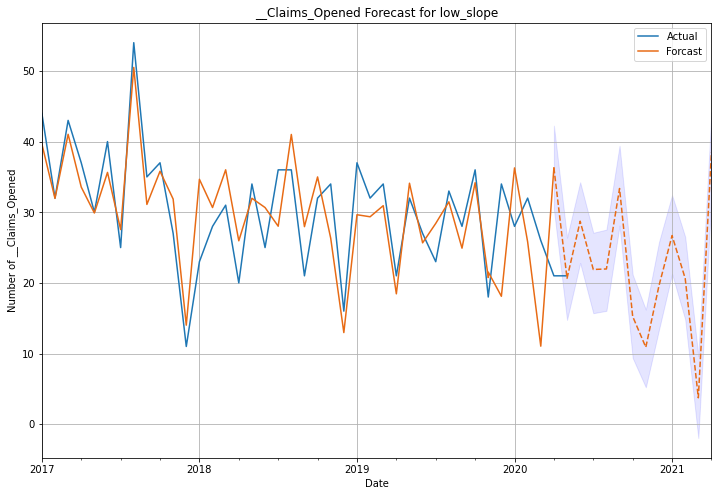

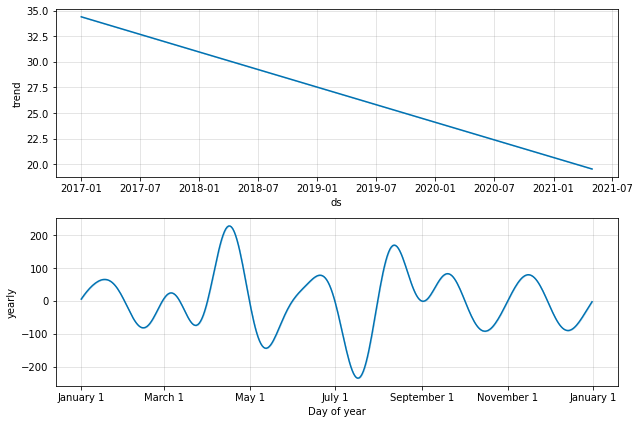

In [1705]:
print('Run for Low_Slope type')
forecast_Low_Slope,m_Low_Slope=run_prophet(train_data_Low_Slope,mean_opened_by_paid_Low_Slope)
plot_prophet(forecast_Low_Slope,train_data_Low_Slope,test_data_Low_Slope,m_Low_Slope,cat='low_slope') 



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Run for Standard type
current_df shape (35, 2)
future_df shape (53, 1)
(6,) (35,)
mean_absolute_error 343.1513831679077
mean_squared_error 132987.0926696215
mean_absolute_percentage_error train 38.237825171068444
mean_absolute_percentage_error validation 6.935002740328487
Prediction of claims for next 12 months
 [566.0, 724.0, 697.0, 647.0, 673.0, 404.0, 818.0, 508.0, 527.0, 603.0, 746.0, 719.0]
Claims paid prediction
 [137.0, 175.0, 169.0, 157.0, 163.0, 98.0, 198.0, 123.0, 128.0, 146.0, 181.0, 174.0]


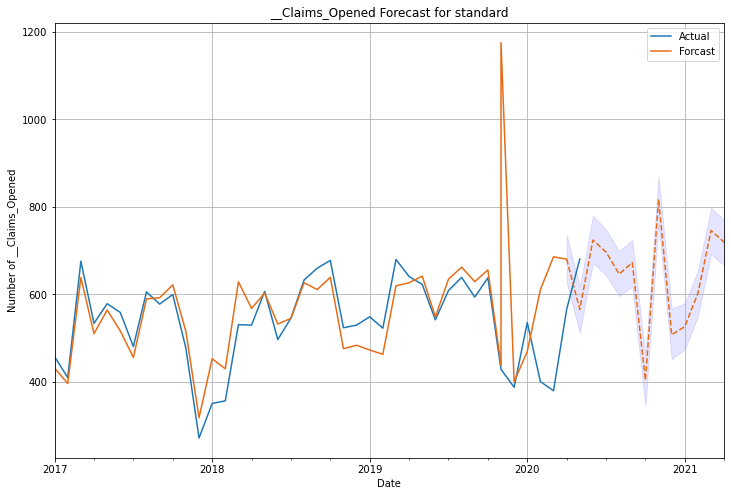

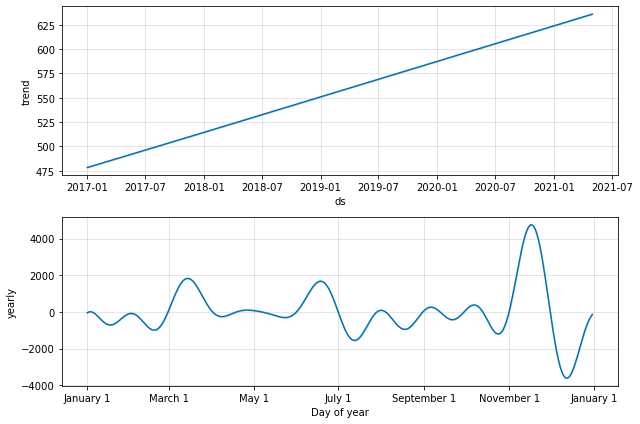

In [1706]:
print('Run for Standard type')
forecast_Standard,m_Standard=run_prophet(train_data_Standard,mean_opened_by_paid_Standard)
plot_prophet(forecast_Standard,train_data_Standard,test_data_Standard,m_Standard,cat='standard') 


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Run for Enhanced type
current_df shape (35, 2)
future_df shape (53, 1)
(6,) (35,)
mean_absolute_error 538.569341196043
mean_squared_error 323119.96920326055
mean_absolute_percentage_error train 59.66962445426888
mean_absolute_percentage_error validation 6.815592431014022
Prediction of claims for next 12 months
 [321.0, 345.0, 372.0, 380.0, 349.0, 304.0, 455.0, 349.0, 425.0, 260.0, 377.0, 414.0]
Claims paid prediction
 [85.0, 92.0, 99.0, 101.0, 93.0, 81.0, 121.0, 93.0, 113.0, 69.0, 100.0, 110.0]


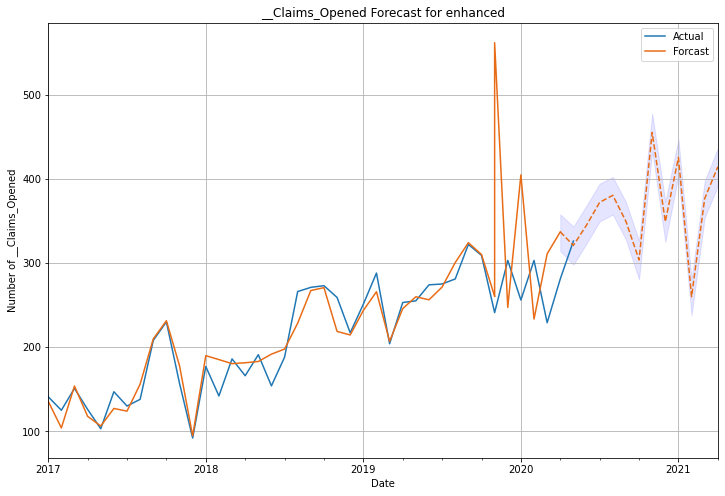

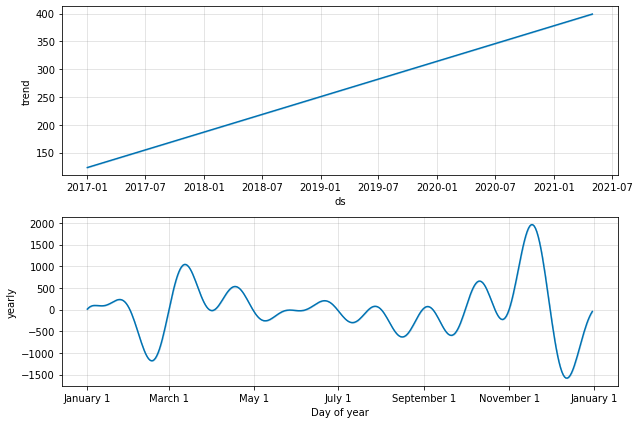

In [1707]:

print('Run for Enhanced type')
forecast_Enhanced,m_Enhanced=run_prophet(train_data_Enhanced,mean_opened_by_paid_Enhanced)
plot_prophet(forecast_Enhanced,train_data_Enhanced,test_data_Enhanced,m_Enhanced,cat='enhanced') 


In [1708]:
# forecast

In [1712]:
# m.fourier_series('2020-01-31',12

TypeError: unsupported operand type(s) for -: 'str' and 'datetime.datetime'

In [1433]:
# test_data.index
# [new_index,val]

train_data

## Simulation approach

Simulation for all category============
Estimates for months from 1 to 12
 [758.0, 577.0, 953.0, 802.0, 946.0, 786.0, 794.0, 1030.0, 1051.0, 1090.0, 703.0]
Forcasts next 6 months
 [946.0, 786.0, 794.0, 1030.0, 1051.0, 1090.0, 703.0]


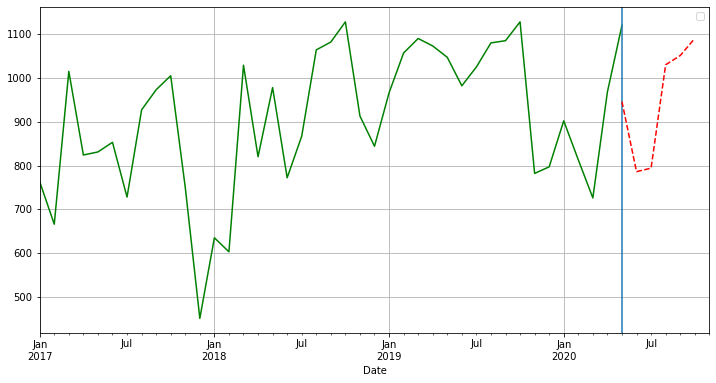

In [1549]:
import math


def simulation_estimate(train_data,test_data):
    data_orig=pd.concat([train_data,test_data])
#     print(data_orig.tail(7))
    data=data_orig.reset_index()
    #percentile for calculating b of tringular 
    percentile=50
    #no of simulation
    no_simu=1000
    #percentile to take for point estimate
    p=50

    #for month 1
    # month=1
    all_est=[]
    for month in range(1,12):
        data['Date']=pd.to_datetime(data['Date'])
        data['month']=data['Date'].dt.month
        data_m=data[data['month']==month]
        #find parameters
        a=min(data_m['__Claims_Opened'])
        c=max(data_m['__Claims_Opened'])
        b=data_m['__Claims_Opened'].quantile(percentile/100)
    #     print('actual claims',data_m['__Claims_Opened'].to_list(),'Parameter values',a,b,c)

        ran_mat=np.random.rand(no_simu)
        pred_simu=np.zeros(no_simu)

        #calculate claimg from random no
        for i in range(no_simu):
            if ran_mat[i] <= (b-a)/(c-a):
                pred_simu[i]=a + math.sqrt(ran_mat[i]*(c-a)*(b-a))
            else:
                pred_simu[i]=b-math.sqrt((1-ran_mat[i])*(c-a)*(c-b))

    #     print('all estimates',pred_simu)    
#         print('Point estimate for month' ,month,sorted(pred_simu.tolist())[int(p*len(pred_simu)/100)])
        all_est.append(round(sorted(pred_simu.tolist())[int(p*len(pred_simu)/100)],0))
    
    print('Estimates for months from 1 to 12\n',all_est)
    #plot
    ax=data_orig['__Claims_Opened'].plot(color='green',label='actual',figsize=(12,6),grid=True)
    new_index=['2020-05-31','2020-06-30','2020-07-31','2020-08-31','2020-09-30','2020-10-31','2020-11-30']
    #month starts from 1 but list index 0
    val=all_est[4:]
    val.extend(all_est[:4])
    print('Forcasts next 6 months\n',val[1:7])
    df=pd.DataFrame([new_index,val[:6]]).T    
    df.columns=['Date','__Claims_Opened']
#     print('++++',df)
    df['Date']=pd.to_datetime(df['Date'])
    df=df.set_index('Date')  #,columns=['Date','val'])
#     print(df)
    ax.axvline(data_orig.index[-1])
    
    df.plot(ax=ax,color='red',label='forcast simulation',style='--',grid=True)


print('Simulation for all category============')        
simulation_estimate(train_data,test_data)

# print('Simulation for new material============')        
# simulation_estimate(train_data_New_Material,test_data_New_Material)

# print('Simulation for low slope===============')        
# simulation_estimate(train_data_Low_Slope,test_data_Low_Slope)

# print('Simulation for standard================')        
# simulation_estimate(train_data_Standard,test_data_Standard)

# print('Simulation for enhanced=================')        
# simulation_estimate(train_data_Enhanced,test_data_Enhanced)





785.4966782095205

In [1017]:
m.

<function fbprophet.forecaster.Prophet.fourier_series(dates, period, series_order)>

In [1461]:
test_data.index[-1]

Timestamp('2020-05-31 00:00:00', freq='M')

## Process for Composites (no data)


In [351]:
# # columns to use and claim type to use
# column_to_use='__Claims_Opened'
# claim_type='Composites'

# clean_data=clean_data_all[clean_data_all['Claim_Type']==claim_type]
# # print(clean_data.head(2))
# print(clean_data.shape)

# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,8))
# clean_data[column_to_use].plot()


## Process for low slope


(41, 16)


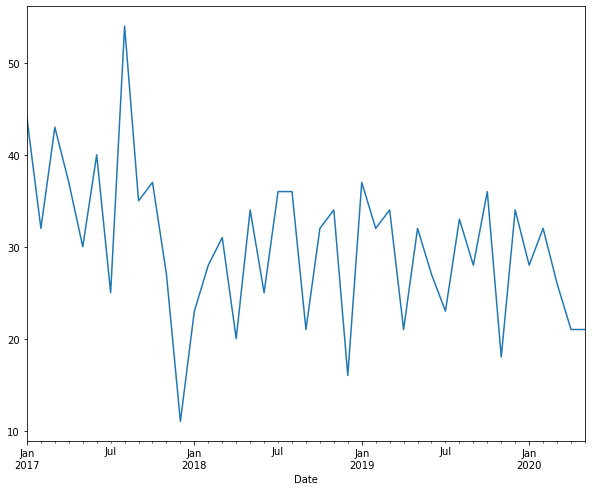

In [352]:
# columns to use and claim type to use
column_to_use='__Claims_Opened'
claim_type='Low Slope'

clean_data=clean_data_all[clean_data_all['Claim_Type']==claim_type]
# print(clean_data.head(2))
print(clean_data.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
clean_data[column_to_use].plot()


<Figure size 720x576 with 0 Axes>

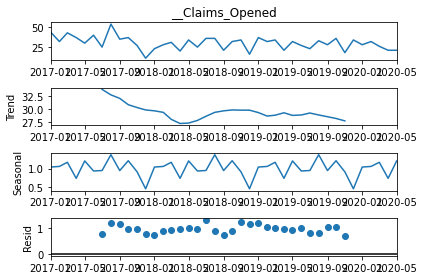

plot corelation************


In [356]:
decompose(clean_data[column_to_use])
print('plot corelation************')
 
    
    

MA value************
MA 6 and 12 months
EWMA


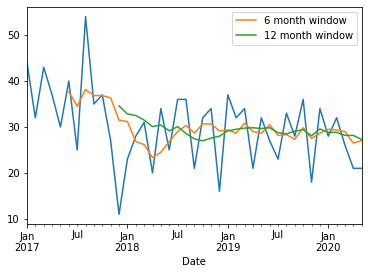

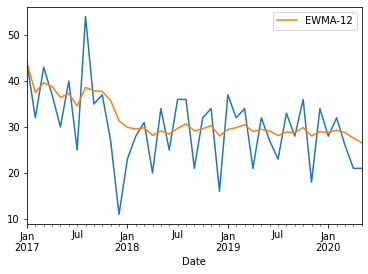

In [357]:
print('MA value************')
MA(clean_data)


EWMA forcast************
mean_absolute_error 62.20008550697421
mean_squared_error 3944.6635799434403
mean_absolute_percentage_error 72.73340253565614


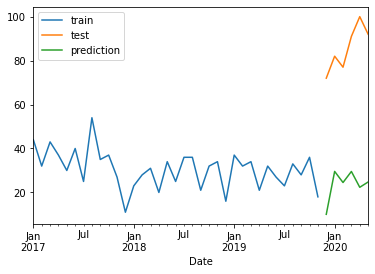

In [358]:
train_data,text_data=split_data(clean_data,loc=35)
print('EWMA forcast************')
forcase_ewma(train_data[column_to_use],test_data[column_to_use])


AR forcast************
AIC score 4.403413391830846
mean_absolute_error 55.309221988255835
mean_squared_error 3153.2225121853226
mean_absolute_percentage_error 64.09356384140284


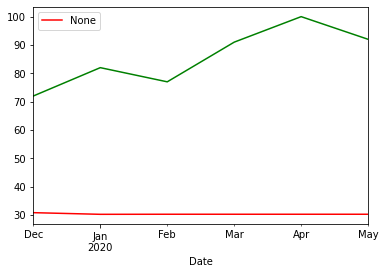

In [359]:
print('AR forcast************')
forcast_ar(train_data[column_to_use],test_data[column_to_use])


ARIMA forcast************
Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=252.984, BIC=256.094, Time=0.011 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=254.906, BIC=259.572, Time=0.039 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=254.933, BIC=259.599, Time=0.033 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=343.447, BIC=345.003, Time=0.006 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=256.979, BIC=263.200, Time=0.049 seconds
Total fit time: 0.142 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                        SARIMAX   Log Likelihood                -124.492
Date:                Mon, 06 Jul 2020   AIC                            252.984
Time:                        14:20:10   BIC                            256.094
Sample:                             0   HQIC           

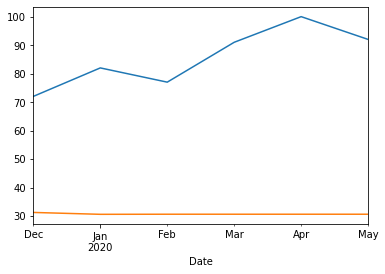

In [360]:
print('ARIMA forcast************')
forcast_arima(train_data[column_to_use],test_data[column_to_use],order=(1,0,0))


ARIMAX forcast************
                                     SARIMAX Results                                      
Dep. Variable:                    __Claims_Opened   No. Observations:                   35
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -135.004
Date:                            Mon, 06 Jul 2020   AIC                            278.007
Time:                                    14:20:18   BIC                            284.229
Sample:                                01-01-2017   HQIC                           280.155
                                     - 11-01-2019                                         
Covariance Type:                              opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
__Claims_Denied     2.2849      0.145     15.737      0.000       2.000      

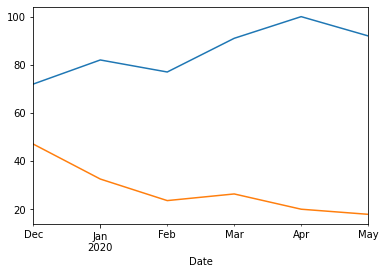

In [361]:
print('ARIMAX forcast************')
forcast_sarimax(train_data[column_to_use],test_data[column_to_use],order=(1,0,0),seasonal_order=(1,0,0,12),exog_train=train_data['__Claims_Denied'],exog_test=test_data['__Claims_Denied'])


## Process for standard


In [ ]:
# columns to use and claim type to use
column_to_use='__Claims_Opened'
claim_type='Standard'

clean_data=clean_data_all[clean_data_all['Claim_Type']==claim_type]
# print(clean_data.head(2))
print(clean_data.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
clean_data[column_to_use].plot()


## Process for enhanced

In [ ]:
# columns to use and claim type to use
column_to_use='__Claims_Opened'
claim_type='Enhanced'

clean_data=clean_data_all[clean_data_all['Claim_Type']==claim_type]
# print(clean_data.head(2))
print(clean_data.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
clean_data[column_to_use].plot()


In [ ]:
decompose(clean_data[column_to_use])
corr_plot(clean_data[column_to_use],lags=10)
MA(clean_data)
train_data,text_data=split_data(clean_data,loc=35)
forcase_ewma(train_data[column_to_use],test_data[column_to_use])
forcast_ar(train_data[column_to_use],test_data[column_to_use])
forcast_arima(train_data[column_to_use],test_data[column_to_use],order=(1,0,0))
forcast_sarimax(train_data[column_to_use],test_data[column_to_use],order=(1,0,0),seasonal_order=(1,0,0,12),exog_train=train_data['__Claims_Denied'],exog_test=test_data['__Claims_Denied'])
 
    
    

In [321]:
# clean_data['Diff_1']
# #sarimax
# # here we see a seasonal value but that very less compare to actualvalue so we will ignore seasionality for this case
# #auto_arima(df2['Inventories'],seasonal=False)
# # this gives aus idea to take d=1, so lets check with d=1 if data become no trend and no seasionality(its ignored) i.e. stationary
# from statsmodels.tsa.statespace.tools import diff

# from statsmodels.tsa.stattools import adfuller 


# print('orig',df.head)
# # create datetime object
# df['date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})
# #print(df.info())
# df = df.set_index('date')
# print('changed',df.head(2))
# df.index.freq='MS'
# df['interpolated'].plot()


In [ ]:
# #exogenous
# # we can include some other features with time series.
# # like along with just count of number we can consider 
# # another variable as weekday information

# df=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\RestaurantVisitors.csv')
# df.index.freq='D'
# print(df.head(5))
# df=df.dropna()
# df['total'].plot()


# # so there are seasonal and trend so we will run SARIMA
# auto_arima(df['interpolated'],seasonal=True,m=12)  # 12 month seasonality as visible from above graph
# # it gives sarimax:0,1,1 x(1,0,1,12)
# #use this and use on train test and predict
# model=sarimax(train['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
# from statsmodels.tsa.seasonal import sesonal_decompose
# result=seasonal_decoppose(df['total'])
# result.plot()

In [ ]:
# # seasonality seems to be weekly
# # if we plot pred from simple SARIMA and actual we see in holidays those doesnot match.
# # split train test
# from pmdarima import auto_arima
# auto_arima(df['total'],seasonal=True,m=7).summary()  # weekly seasonal
# # below is for exogenous
# auto_arima(df['total'],exogenous=df[['holiday']],seasonal=True,m=7).summary()  # weekly seasonal

# # this gives sarimax(1,0,0)x(2,0,0,7)
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# model=SARIMAX(train['toal'],order=(1,0,0),seasonal_order=(2,0,0,7),
#              enforce_invertibility=False)
# model_exogenous=SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,1),seasonal_order=(1,0,1,7))
# pred=result.predict(start,end,exog=test[['holiday']])

# results=model.fit()
# # we need to already know future exogenous variable or at leats have very confident estimate
# # based on other data, we will only predict y and not exogenous variable